# Engenharia de features
Pretendo deixar todos os campos da tabela formatados para fazer regressão

In [22]:
import numpy as np
import pandas as pd
import ast

In [23]:
def literal_eval(x):
    if pd.isna(x):
        return dict()
    raw_dict = ast.literal_eval(x)
    for key in raw_dict:
        raw_dict[key] = ast.literal_eval(raw_dict[key])
    return raw_dict
        
def proccess_df(df):
    df['loc'] = df['loc'].apply(lambda x: ast.literal_eval(x))
    df['attributes'] = df['attributes'].apply(literal_eval)
    df['hours'] = df['hours'].apply(lambda x: ast.literal_eval(x) if not pd.isna(x) else dict())

In [24]:
df = pd.read_csv('dados/X_trainToronto.csv').set_index('business_id')
proccess_df(df)
df

,name,address,postal_code,latitude,longitude,review_count,is_open,attributes,categories,hours,loc,destaque
business_id,,,,,,,,,,,,
vHzWmPWHN4J1hRR3W3AMQg,Salt Wine Bar,225 Ossington Ave,M6J 2Z8,43.648977,-79.420495,99,1,"{'Ambience': {'romantic': False, 'intimate': F...","Wine Bars, Tapas/Small Plates, Restaurants, Ba...","{'Monday': '18:0-23:0', 'Tuesday': '18:0-23:0'...","{'type': 'Point', 'coordinates': [-79.4204946,...",0
15to24Q-otAHmto7FzsWRg,William's Beauty Supplies,2229 Dundas Street W,M6R 1X6,43.654002,-79.452189,3,1,"{'BusinessParking': {'garage': False, 'street'...","Beauty & Spas, Hair Salons, Barbers, Shopping,...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...","{'type': 'Point', 'coordinates': [-79.4521893,...",0
8aqKdf4G4AAir8k_Kdslvg,Integra Health Centre,1320-130 King Street W,M5X 1C8,43.648493,-79.383214,18,1,"{'ByAppointmentOnly': True, 'AcceptsInsurance'...","Health & Medical, Medical Centers","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...","{'type': 'Point', 'coordinates': [-79.3832139,...",0
uxU1vr5AhhkTQ83X0bpeyg,North York General Hospital,555 Finch Avenue W,M2R 1N5,43.772453,-79.448136,3,0,{'ByAppointmentOnly': False},"Health & Medical, Hospitals, Medical Centers",{},"{'type': 'Point', 'coordinates': [-79.4481361,...",0
f702hTJoqdR34Jn23C7d1A,Dr Jamie's Bike Clinic,2741 Dundas St W,M6P,43.665082,-79.460800,3,1,{'RestaurantsPriceRange2': 3},"Automotive, Bikes, Shopping, Auto Repair, Spor...",{},"{'type': 'Point', 'coordinates': [-79.4607999,...",0
...,...,...,...,...,...,...,...,...,...,...,...,...
Zp5xil8pC6Bm-fFOWIbh0Q,Burrito Zone,2030 Ellesmere Road,M1H 2V6,43.776237,-79.235318,16,1,"{'Caters': True, 'BikeParking': False, 'WiFi':...","Restaurants, Halal, Mexican","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...","{'type': 'Point', 'coordinates': [-79.23531845...",0
o2811xZ0ufRi7WcsqWiGzw,Starbucks,50 Bloor Street W,M4W 3L8,43.670098,-79.388198,4,1,"{'RestaurantsPriceRange2': 2, 'BikeParking': F...","Food, Coffee & Tea",{},"{'type': 'Point', 'coordinates': [-79.38819842...",0
v9T9m_TbpLuaC2Kud5UbLA,Caruso Fine Tailors,830 Danforth Avenue,M4J 1L6,43.679862,-79.340900,8,1,"{'RestaurantsPriceRange2': 2, 'BikeParking': T...","Sewing & Alterations, Shopping, Local Services","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'...","{'type': 'Point', 'coordinates': [-79.3408995,...",0


### Atributos para fazer a regressão

In [25]:
df_reg = df.copy()
df_reg = df_reg[['latitude', 'longitude', 'attributes', 'categories', 'hours', 'destaque']].reset_index()
df_reg

,business_id,latitude,longitude,attributes,categories,hours,destaque
0,vHzWmPWHN4J1hRR3W3AMQg,43.648977,-79.420495,"{'Ambience': {'romantic': False, 'intimate': F...","Wine Bars, Tapas/Small Plates, Restaurants, Ba...","{'Monday': '18:0-23:0', 'Tuesday': '18:0-23:0'...",0
1,15to24Q-otAHmto7FzsWRg,43.654002,-79.452189,"{'BusinessParking': {'garage': False, 'street'...","Beauty & Spas, Hair Salons, Barbers, Shopping,...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...",0
2,8aqKdf4G4AAir8k_Kdslvg,43.648493,-79.383214,"{'ByAppointmentOnly': True, 'AcceptsInsurance'...","Health & Medical, Medical Centers","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",0
3,uxU1vr5AhhkTQ83X0bpeyg,43.772453,-79.448136,{'ByAppointmentOnly': False},"Health & Medical, Hospitals, Medical Centers",{},0
4,f702hTJoqdR34Jn23C7d1A,43.665082,-79.460800,{'RestaurantsPriceRange2': 3},"Automotive, Bikes, Shopping, Auto Repair, Spor...",{},0
...,...,...,...,...,...,...,...
17577,Zp5xil8pC6Bm-fFOWIbh0Q,43.776237,-79.235318,"{'Caters': True, 'BikeParking': False, 'WiFi':...","Restaurants, Halal, Mexican","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",0
17578,o2811xZ0ufRi7WcsqWiGzw,43.670098,-79.388198,"{'RestaurantsPriceRange2': 2, 'BikeParking': F...","Food, Coffee & Tea",{},0
17579,v9T9m_TbpLuaC2Kud5UbLA,43.679862,-79.340900,"{'RestaurantsPriceRange2': 2, 'BikeParking': T...","Sewing & Alterations, Shopping, Local Services","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'...",0
17580,bzGnAIe9OiBHGWJE-dZ_8g,43.745578,-79.220423,"{'BusinessParking': {'garage': False, 'street'...","Chicken Wings, Bars, Nightlife, Restaurants, P...","{'Monday': '11:30-1:0', 'Tuesday': '11:30-1:0'...",0


### Transformar Attributes em dummy values

In [32]:
from collections import defaultdict

unique_attributes = defaultdict(set)
two_layer_attributtes = defaultdict(set)
attributes = df['attributes']
for item_dict in attributes:
    for key in item_dict:
        if type(item_dict[key]) is dict:
            for key2 in item_dict[key]:
                two_layer_attributtes[(key, key2)].add(item_dict[key][key2])
        else:
            unique_attributes[key].add(item_dict[key])

for attr1, attr2 in two_layer_attributtes:
    if attr1 in unique_attributes:
        unique_attributes.pop(attr1, None)

def dummy_attr(row):
    atributes = {}
    obj = row['attributes']
    if row['attributes'] == None:
        obj = dict()
    for key in unique_attributes:
        atributes[key] = None
        if key in obj:
            atributes[key] = obj[key]
            
    for attr1, attr2 in two_layer_attributtes:
        key = f'{attr1}.{attr2}'
        atributes[key] = None
        if attr1 in obj and type(obj[attr1]) is dict and attr2 in obj[attr1]:
            atributes[key] = obj[attr1][attr2]
    return atributes

df_attr = pd.DataFrame.from_dict(list(df_reg.apply(dummy_attr, axis=1)))
df_almost_dummie = pd.concat([df_reg, df_attr], axis=1)
new_columns = {at: 'attribute_' + at for at in df_attr.columns}
df_almost_dummie = df_almost_dummie.rename(columns=new_columns)

df_dummies = pd.get_dummies(df_almost_dummie[new_columns.values()].astype(str))
columns_to_drop = [x for x in list(df_dummies.columns) if ('_nan' in x or '_None' in x or '_none' in x)]
df_dummies = df_dummies.drop(columns_to_drop, axis=1)

df_reg = pd.concat([df_reg, df_dummies], axis=1)
df_reg

,business_id,latitude,longitude,attributes,categories,hours,destaque,attribute_Caters_False,attribute_Caters_True,attribute_WiFi_free,...,attribute_DietaryRestrictions.vegan_True,attribute_DietaryRestrictions.kosher_False,attribute_DietaryRestrictions.halal_False,attribute_DietaryRestrictions.halal_True,attribute_DietaryRestrictions.soy-free_False,attribute_DietaryRestrictions.vegetarian_False,attribute_DietaryRestrictions.vegetarian_True,attribute_HairSpecializesIn.straightperms_False,attribute_HairSpecializesIn.africanamerican_False,attribute_HairSpecializesIn.asian_False
0,vHzWmPWHN4J1hRR3W3AMQg,43.648977,-79.420495,"{'Ambience': {'romantic': False, 'intimate': F...","Wine Bars, Tapas/Small Plates, Restaurants, Ba...","{'Monday': '18:0-23:0', 'Tuesday': '18:0-23:0'...",0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,15to24Q-otAHmto7FzsWRg,43.654002,-79.452189,"{'BusinessParking': {'garage': False, 'street'...","Beauty & Spas, Hair Salons, Barbers, Shopping,...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...",0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8aqKdf4G4AAir8k_Kdslvg,43.648493,-79.383214,"{'ByAppointmentOnly': True, 'AcceptsInsurance'...","Health & Medical, Medical Centers","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,uxU1vr5AhhkTQ83X0bpeyg,43.772453,-79.448136,{'ByAppointmentOnly': False},"Health & Medical, Hospitals, Medical Centers",{},0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,f702hTJoqdR34Jn23C7d1A,43.665082,-79.460800,{'RestaurantsPriceRange2': 3},"Automotive, Bikes, Shopping, Auto Repair, Spor...",{},0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17577,Zp5xil8pC6Bm-fFOWIbh0Q,43.776237,-79.235318,"{'Caters': True, 'BikeParking': False, 'WiFi':...","Restaurants, Halal, Mexican","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",0,False,True,True,...,False,False,False,False,False,False,False,False,False,False
17578,o2811xZ0ufRi7WcsqWiGzw,43.670098,-79.388198,"{'RestaurantsPriceRange2': 2, 'BikeParking': F...","Food, Coffee & Tea",{},0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17579,v9T9m_TbpLuaC2Kud5UbLA,43.679862,-79.340900,"{'RestaurantsPriceRange2': 2, 'BikeParking': T...","Sewing & Alterations, Shopping, Local Services","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'...",0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
17580,bzGnAIe9OiBHGWJE-dZ_8g,43.745578,-79.220423,"{'BusinessParking': {'garage': False, 'street'...","Chicken Wings, Bars, Nightlife, Restaurants, P...","{'Monday': '11:30-1:0', 'Tuesday': '11:30-1:0'...",0,False,True,False,...,False,False,False,False,False,False,False,False,False,False


## Transformar categories em dummies

In [33]:
df_reg.categories = df_reg.categories.fillna('')
df_reg.categories = df_reg.categories.astype(str)
df_reg.categories = df_reg.categories.str.split(',')
df_reg.categories = df_reg.categories.apply(lambda x: [s.strip().lower() for s in x])

In [34]:
from collections import defaultdict

all_categories = defaultdict(int)
for c_list in df_reg.categories:
    if type(c_list) is float:
        c_list = []
    for c in c_list:
        all_categories[c.strip().lower()] = all_categories[c.strip().lower()] + 1

best_categories = pd.Series(all_categories)
best_categories = best_categories[best_categories > 50]
others_categories = set(all_categories.keys()).difference(set(best_categories.index))
best_categories

wine bars                 127
tapas/small plates         94
restaurants              7418
bars                     1443
nightlife                1616
                         ... 
tires                      52
chicken shop               65
dog walkers                51
banks & credit unions      52
music venues              146
Length: 203, dtype: int64

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
df_cat_dummies = pd.DataFrame(mlb.fit_transform(df_reg.categories),columns=mlb.classes_, index=df_reg.index)
df_cat_dummies['others_categories'] = df_cat_dummies.apply(lambda x: x[list(others_categories)].sum(), axis=1)
df_cat_dummies = df_cat_dummies.drop(list(others_categories), axis=1)
df_reg = pd.concat([df_reg, df_cat_dummies], axis=1)
df_reg = df_reg.rename(columns={cat:'category_' + cat for cat in best_categories.index})
df_reg

## Tratamento das horas abertas

In [40]:
from datetime import datetime, timedelta

midnight_tomorrow = datetime.strptime("0:0", "%H:%M") + timedelta(days=1)
midnight_today = datetime.strptime("0:0", "%H:%M")
daysOfWeek = {'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'}
times_of_day = {
         'morning': (datetime.strptime('6:0', "%H:%M"), datetime.strptime('12:0', "%H:%M")), 
         'afternoon': (datetime.strptime('12:0', "%H:%M"), datetime.strptime('18:0', "%H:%M")), 
         'evening': (datetime.strptime('18:0', "%H:%M"), midnight_tomorrow),
         'night': (midnight_today, datetime.strptime('6:0', "%H:%M"))
        }

def fill_hours(obj):
    result = {}
    for dayOfweek in daysOfWeek:
        hour1 = datetime.strptime("0:0", "%H:%M")
        hour2 = datetime.strptime("0:0", "%H:%M")
        if dayOfweek in obj:
            hours_obj = obj[dayOfweek].split('-')
            hour1 = datetime.strptime(hours_obj[0], "%H:%M")
            hour2 = datetime.strptime(hours_obj[1], "%H:%M")
            if hour1 >= hour2:
                hour2 += timedelta(days=1)
        for key in times_of_day:
            d1 = times_of_day[key][0]
            d2 = times_of_day[key][1]
            
            value = calculate_hoursOfDay(hour1, hour2, d1, d2)
            result[f'business_open_{dayOfweek}_{key}'] = value
    return result
            
    
def calculate_hoursOfDay(hour1: datetime, hour2: datetime, d1: datetime, d2: datetime):
    if hour1 > d2 or hour2 < d1:
        if hour2.day == midnight_tomorrow.day and (hour1 != midnight_tomorrow and hour2 != midnight_tomorrow):
            day1 = calculate_hoursOfDay(midnight_tomorrow, hour2, d1 + timedelta(days=1), d2 + timedelta(days=1))
            day2 = calculate_hoursOfDay(hour1, midnight_tomorrow, d1, d2)
            return day1 + day2
        return 0.0
        
    inf = hour1
    sup = hour2
    if hour1 <= d1:
        inf = d1
    if hour2 >= d2:
        sup = d2
        
    return float((sup - inf).seconds) / 21600.0

In [41]:
hours_features = pd.DataFrame(list(df_reg['hours'].apply(fill_hours)))
df_reg = pd.concat([df_reg, hours_features], axis=1)
df_reg

,business_id,latitude,longitude,attributes,categories,hours,destaque,attribute_Caters_False,attribute_Caters_True,attribute_WiFi_free,...,business_open_Saturday_evening,business_open_Saturday_night,business_open_Sunday_morning,business_open_Sunday_afternoon,business_open_Sunday_evening,business_open_Sunday_night,business_open_Wednesday_morning,business_open_Wednesday_afternoon,business_open_Wednesday_evening,business_open_Wednesday_night
0,vHzWmPWHN4J1hRR3W3AMQg,43.648977,-79.420495,"{'Ambience': {'romantic': False, 'intimate': F...","[wine bars, tapas/small plates, restaurants, b...","{'Monday': '18:0-23:0', 'Tuesday': '18:0-23:0'...",0,True,False,False,...,0.750000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.833333,0.000000
1,15to24Q-otAHmto7FzsWRg,43.654002,-79.452189,"{'BusinessParking': {'garage': False, 'street'...","[beauty & spas, hair salons, barbers, shopping...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...",0,False,False,False,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.500000,0.833333,0.000000,0.000000
2,8aqKdf4G4AAir8k_Kdslvg,43.648493,-79.383214,"{'ByAppointmentOnly': True, 'AcceptsInsurance'...","[health & medical, medical centers]","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",0,False,False,False,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.833333,1.000000,0.333333,0.000000
3,uxU1vr5AhhkTQ83X0bpeyg,43.772453,-79.448136,{'ByAppointmentOnly': False},"[health & medical, hospitals, medical centers]",{},0,False,False,False,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,f702hTJoqdR34Jn23C7d1A,43.665082,-79.460800,{'RestaurantsPriceRange2': 3},"[automotive, bikes, shopping, auto repair, spo...",{},0,False,False,False,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17577,Zp5xil8pC6Bm-fFOWIbh0Q,43.776237,-79.235318,"{'Caters': True, 'BikeParking': False, 'WiFi':...","[restaurants, halal, mexican]","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",0,False,True,True,...,0.833333,0.000000,0.000000,1.0,0.833333,0.0,0.166667,1.000000,0.833333,0.000000
17578,o2811xZ0ufRi7WcsqWiGzw,43.670098,-79.388198,"{'RestaurantsPriceRange2': 2, 'BikeParking': F...","[food, coffee & tea]",{},0,False,False,False,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
17579,v9T9m_TbpLuaC2Kud5UbLA,43.679862,-79.340900,"{'RestaurantsPriceRange2': 2, 'BikeParking': T...","[sewing & alterations, shopping, local services]","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'...",0,False,False,False,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.333333,1.000000,0.000000,0.000000
17580,bzGnAIe9OiBHGWJE-dZ_8g,43.745578,-79.220423,"{'BusinessParking': {'garage': False, 'street'...","[chicken wings, bars, nightlife, restaurants, ...","{'Monday': '11:30-1:0', 'Tuesday': '11:30-1:0'...",0,False,True,False,...,1.000000,0.333333,0.083333,1.0,1.000000,0.0,0.083333,1.000000,1.000000,0.166667


## Fazer grafo bipartido de locais
Se uma pessoa fez uma avaliação de dois estabelecimentos, uma aresta será formada entre eles

In [20]:
df_review = pd.read_csv('dados_produzidos/reviewsTrainTorontoSentiment.csv')
df_review

,label,score,business_id,user_id,text_hash,useful,cool,funny
0,5,0.549039,--DaPTJW3-tB1vP-PfdTEg,Y2TBSd3ExydbgEnVxAt_QA,1e890783a9704450433a1dc106edc21061a03995,0,0,0
1,5,0.495692,--DaPTJW3-tB1vP-PfdTEg,Rp-cSUHm-EKBxgBS73PNNg,78eeb17f9841de9e3ec59fdd58f5d6517837e9c5,3,2,0
2,4,0.315593,--DaPTJW3-tB1vP-PfdTEg,2fXZuNKP7Bo-yRrINVbVVA,d9e84e7024b8a8c0f4d5a18696478b662205b028,0,0,0
3,3,0.381734,--DaPTJW3-tB1vP-PfdTEg,fn3Wim-2j042IEDe6VhJFQ,eeb46e802e2b72c5724465f258a9840f28753377,5,5,1
4,2,0.646709,--DaPTJW3-tB1vP-PfdTEg,CD9dSllum_L_OvpRW0YH0w,dabd5db824a3ed91ed90de59e80a4700452d561e,0,0,0
...,...,...,...,...,...,...,...,...
490958,4,0.383298,zzvlwkcNR1CCqOPXwuvz2A,YyV_UBEAoTMgwImiKnWYTQ,0ca783cf1fc66ae112af79d839e9f21261875392,0,0,0
490959,2,0.490604,zzvlwkcNR1CCqOPXwuvz2A,pkRISP8QgKMDPQlr8eNrdA,a1c9cf5c6e831191f2b64a0f1ba404c06e7f0631,0,0,0
490960,4,0.408329,zzvlwkcNR1CCqOPXwuvz2A,yDRw0UY7FhjDAs-q1bvRhg,82b3baa4cd777a6852545c08846e309140eba6ba,0,0,0
490961,5,0.967402,zzvlwkcNR1CCqOPXwuvz2A,U708fyOqNaBU0IQoE6E7WQ,1ddfcabd901a21a227ca0ff8ada688b2160332ea,0,0,0


In [65]:
df_index_to_business = pd.DataFrame(df_reg['business_id'])
df_business_to_index = df_reg['business_id'].reset_index().set_index('business_id')
df_index_to_review_count = df.reset_index()['review_count'].values
display(df_index_to_business)
display(df_business_to_index)

,business_id
0,vHzWmPWHN4J1hRR3W3AMQg
1,15to24Q-otAHmto7FzsWRg
2,8aqKdf4G4AAir8k_Kdslvg
3,uxU1vr5AhhkTQ83X0bpeyg
4,f702hTJoqdR34Jn23C7d1A
...,...
17577,Zp5xil8pC6Bm-fFOWIbh0Q
17578,o2811xZ0ufRi7WcsqWiGzw
17579,v9T9m_TbpLuaC2Kud5UbLA
17580,bzGnAIe9OiBHGWJE-dZ_8g


,index
business_id,
vHzWmPWHN4J1hRR3W3AMQg,0
15to24Q-otAHmto7FzsWRg,1
8aqKdf4G4AAir8k_Kdslvg,2
uxU1vr5AhhkTQ83X0bpeyg,3
f702hTJoqdR34Jn23C7d1A,4
...,...
Zp5xil8pC6Bm-fFOWIbh0Q,17577
o2811xZ0ufRi7WcsqWiGzw,17578
v9T9m_TbpLuaC2Kud5UbLA,17579


In [74]:
import itertools
import networkx as nx
from tqdm import tqdm

tqdm.pandas()
G = nx.Graph()
G.add_nodes_from(df_index_to_business.index)
    
def add_edges(rows):
    if len(rows) < 2:
        return
    business_ids = [df_business_to_index.loc[x].iloc[0] for x in rows['business_id'].unique()]
    for comb in itertools.combinations(business_ids, 2):
        if comb in G.edges:
            G.edges[comb[0], comb[1]]['weight'] += 1
        else:
            G.add_edge(comb[0], comb[1], weight=1)

df_review.groupby('user_id').progress_apply(add_edges)
G.number_of_edges()

100%|█████████████████████████████████| 109250/109250 [01:32<00:00, 1177.38it/s]


8442907

In [75]:
G_backup = G.copy()

In [77]:
edge_percent = 0.1
edges_to_remove = []
for u,v,a in tqdm(G.edges(data=True), total=G.number_of_edges()):
    weight = a['weight']
    u_review_count = df_index_to_review_count[u]
    v_review_count = df_index_to_review_count[v]
    if float(weight) < edge_percent * float(min(u_review_count, v_review_count)):
        edges_to_remove.append((u, v))

100%|█████████████████████████████| 8442906/8442906 [00:31<00:00, 267732.59it/s]


In [78]:
for u,v in tqdm(edges_to_remove):
    G.remove_edge(u, v)

100%|█████████████████████████████| 5233403/5233403 [00:10<00:00, 482257.33it/s]


In [ ]:
page_rank = nx.pagerank(G, alpha=0.9)
page_rank

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_reg['page_rank'] = pd.Series(page_rank)
df_reg['page_rank'] = scaler.fit_transform(df_reg['page_rank'])
df_reg['page_rank']

In [92]:
nx.write_gml(G, 'dados_produzidos/grafo_business_reviews.gml')

## Normalizar e limpar dados

In [45]:
from sklearn.preprocessing import StandardScaler
data_to_normalize = ['latitude', 'longitude', 'review_count']
data = df[data_to_normalize]
scaler = StandardScaler()
scaler.fit(data)
df_reg[data_to_normalize] = scaler.transform(data)
df_reg[data_to_normalize]

,latitude,longitude,review_count
0,-0.686427,-0.425989,1.190565
1,-0.569901,-0.956974,-0.400175
2,-0.697652,0.198579,-0.151622
3,2.177144,-0.889070,-0.400175
4,-0.312937,-1.101228,-0.400175
...,...,...,...
17577,2.264886,2.676289,-0.184762
17578,-0.196596,0.115073,-0.383605
17579,0.029843,0.907477,-0.317324
17580,1.553877,2.925831,-0.300754


In [51]:
not_regression_columns = ['business_id', 'attributes', 'categories', 'hours', 'destaque']
regression_columns = [x for x in df_reg.columns if x not in not_regression_columns]
df_reg[regression_columns] = df_reg[regression_columns].apply(lambda x: x.astype(float))
df_reg[regression_columns]

,latitude,longitude,attribute_Caters_False,attribute_Caters_True,attribute_WiFi_free,attribute_WiFi_no,attribute_WiFi_paid,attribute_OutdoorSeating_False,attribute_OutdoorSeating_True,attribute_RestaurantsTakeOut_False,...,business_open_Sunday_evening,business_open_Sunday_night,business_open_Wednesday_morning,business_open_Wednesday_afternoon,business_open_Wednesday_evening,business_open_Wednesday_night,page_rank,review_count,stars,score
0,-0.686427,-0.425989,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.000000,0.0,0.000000,0.000000,0.833333,0.000000,0.000087,1.190565,0.582949,0.532271
1,-0.569901,-0.956974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.500000,0.833333,0.000000,0.000000,0.000030,-0.400175,0.791667,0.577041
2,-0.697652,0.198579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.833333,1.000000,0.333333,0.000000,0.000016,-0.151622,0.340136,0.706820
3,2.177144,-0.889070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000030,-0.400175,0.666667,0.400056
4,-0.312937,-1.101228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000008,-0.400175,0.006757,0.511156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17577,2.264886,2.676289,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.833333,0.0,0.166667,1.000000,0.833333,0.000000,0.000011,-0.184762,0.320359,0.567692
17578,-0.196596,0.115073,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000030,-0.383605,0.772727,0.757226
17579,0.029843,0.907477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.333333,1.000000,0.000000,0.000000,0.000047,-0.317324,0.568000,0.657578
17580,1.553877,2.925831,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.000000,0.0,0.083333,1.000000,1.000000,0.166667,0.000018,-0.300754,0.146341,0.696177


In [424]:
def detect_outliers_iqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return upper_bound

upper_bound = detect_outliers_iqr(df_reg['page_rank'])
df_reg['is_page_rank_outlier'] = (df_reg['page_rank'] >= upper_bound).astype(float)
df_reg['is_page_rank_outlier'].value_counts()

is_page_rank_outlier
0.0    16252
1.0     1330
Name: count, dtype: int64

## Calcular score das analises

In [49]:
def make_df_score(df, df_reviews):
    weights = {
        'useful': 1,
        'cool': 0.75,
        'funny': 0.5
    }
    df_reviews['weight'] = df_reviews.apply(lambda row: 1 + row['useful'] * weights['useful'] + row['cool'] * weights['cool'] + row['funny'] * weights['funny'], axis=1)
    def wavg_label(group):
        d = group['label']
        w = group['weight']
        return (d * w).sum() / w.sum()
    
    def wavg_score(group):
        d = group['score']
        w = group['weight']
        return (d * w).sum() / w.sum()
        
    df_reviews_label_grouped = df_reviews.groupby(['business_id']).apply(wavg_label, include_groups=False)
    df_reviews_score_grouped = df_reviews.groupby(['business_id']).apply(wavg_score, include_groups=False)
    df_reviews_scores = pd.DataFrame(df_reviews_label_grouped, columns=['stars']).join(pd.DataFrame(df_reviews_score_grouped, columns=['score']))
    df_score = df.join(df_reviews_scores)
    df_score['stars'] = (df_score['stars']-df_score['stars'].min())/(df_score['stars'].max()-df_score['stars'].min())
    return df_score

df_score = make_df_score(df, pd.read_csv('dados_produzidos/reviewsTrainTorontoSentiment.csv'))
df_reg[['stars', 'score']] = df_score.reset_index()[['stars', 'score']]
df_reg[['stars', 'score']]

,stars,score
0,0.582949,0.532271
1,0.791667,0.577041
2,0.340136,0.706820
3,0.666667,0.400056
4,0.006757,0.511156
...,...,...
17577,0.320359,0.567692
17578,0.772727,0.757226
17579,0.568000,0.657578
17580,0.146341,0.696177


# Salvar Dados

In [425]:
df_reg.to_csv('dados_produzidos/df_reg.csv', index=False)

In [42]:
df_reg_2 = pd.read_csv('dados_produzidos/df_reg.csv')
df_reg_2

,business_id,latitude,longitude,attributes,categories,hours,destaque,Caters_False,Caters_True,WiFi_free,...,business_open_Thursday_morning,business_open_Thursday_afternoon,business_open_Thursday_evening,business_open_Thursday_night,business_open_Sunday_morning,business_open_Sunday_afternoon,business_open_Sunday_evening,business_open_Sunday_night,page_rank,review_count
0,vHzWmPWHN4J1hRR3W3AMQg,43.648977,-79.420495,"{'Ambience': {'romantic': False, 'intimate': F...","['wine bars', 'tapas/small plates', 'restauran...","{'Monday': '18:0-23:0', 'Tuesday': '18:0-23:0'...",0,True,False,False,...,0.000000,0.000000,0.833333,0.000000,0.000000,0.0,0.000000,0.0,0.000087,NaN
1,15to24Q-otAHmto7FzsWRg,43.654002,-79.452189,"{'BusinessParking': {'garage': False, 'street'...","['beauty & spas', 'hair salons', 'barbers', 's...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...",0,False,False,False,...,0.500000,0.833333,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000030,NaN
2,8aqKdf4G4AAir8k_Kdslvg,43.648493,-79.383214,"{'ByAppointmentOnly': True, 'AcceptsInsurance'...","['health & medical', 'medical centers']","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",0,False,False,False,...,0.833333,1.000000,0.333333,0.000000,0.000000,0.0,0.000000,0.0,0.000016,NaN
3,uxU1vr5AhhkTQ83X0bpeyg,43.772453,-79.448136,{'ByAppointmentOnly': False},"['health & medical', 'hospitals', 'medical cen...",{},0,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000030,NaN
4,f702hTJoqdR34Jn23C7d1A,43.665082,-79.460800,{'RestaurantsPriceRange2': 3},"['automotive', 'bikes', 'shopping', 'auto repa...",{},0,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000008,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17577,Zp5xil8pC6Bm-fFOWIbh0Q,43.776237,-79.235318,"{'Caters': True, 'BikeParking': False, 'WiFi':...","['restaurants', 'halal', 'mexican']","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",0,False,True,True,...,0.166667,1.000000,0.833333,0.000000,0.000000,1.0,0.833333,0.0,0.000011,NaN
17578,o2811xZ0ufRi7WcsqWiGzw,43.670098,-79.388198,"{'RestaurantsPriceRange2': 2, 'BikeParking': F...","['food', 'coffee & tea']",{},0,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000030,NaN
17579,v9T9m_TbpLuaC2Kud5UbLA,43.679862,-79.340900,"{'RestaurantsPriceRange2': 2, 'BikeParking': T...","['sewing & alterations', 'shopping', 'local se...","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'...",0,False,False,False,...,0.333333,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000047,NaN
17580,bzGnAIe9OiBHGWJE-dZ_8g,43.745578,-79.220423,"{'BusinessParking': {'garage': False, 'street'...","['chicken wings', 'bars', 'nightlife', 'restau...","{'Monday': '11:30-1:0', 'Tuesday': '11:30-1:0'...",0,False,True,False,...,0.083333,1.000000,1.000000,0.166667,0.083333,1.0,1.000000,0.0,0.000018,NaN


## Redução de dimensionalidade para análise

In [431]:
not_regression_columns = ['business_id', 'attributes', 'categories', 'hours', 'destaque']
regression_columns = [x for x in df_reg.columns if x not in not_regression_columns]
df_X = df_reg[regression_columns]
df_y = df_reg['destaque']

In [432]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn import metrics

def measure(y_test, y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    
    # Calculate precision
    precision = precision_score(y_test, y_pred)
    print("Precision:", precision)
    
    # Calculate recall (sensitivity)
    recall = recall_score(y_test, y_pred)
    print("Recall (Sensitivity):", recall)
    
    # Calculate F1-score
    f1 = f1_score(y_test, y_pred)
    print("F1-Score:", f1)

def calculate_roc_curve(y_test, y_pred, estimador='none'):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, label=estimador + ", auc="+str(auc))
    plt.legend(loc=0)


Sem seleção de feature, sem redução de dimensionalidade o auc score pemaneceu em 0.81

In [433]:
category_columns = [col for col in df_reg.columns if col.startswith( 'category_')] + ['others_categories']
attributes_columns = [col for col in df_reg.columns if col.startswith( 'attribute_')]
hours_columns = [col for col in df_reg.columns if col.startswith( 'business_open_')]
geo_columns = ['latitude', 'longitude']
print("category lenght:", len(category_columns))
print("attributes lenght:", len(attributes_columns))
print("hours lenght:", len(hours_columns))

category lenght: 204
attributes lenght: 150
hours lenght: 28


In [435]:
from sklearn.feature_selection import SelectKBest, f_classif
import math
factor = 0.80

def select_best(columns):
    features_num = math.ceil(factor * len(columns))
    selector = SelectKBest(f_classif, k=features_num)
    X_new = pd.DataFrame(selector.fit_transform(df_X[columns], df_y), 
                        columns=[list(df_X[columns].iloc[:, selector.get_support(indices=True)].columns)])
    X_new.columns = [''.join(col) for col in X_new.columns.values]
    return X_new

df_X_best_cat = select_best(category_columns)
df_X_best_attr = select_best(attributes_columns)
df_X_best_hours = select_best(hours_columns)
df_X_select = df_X.drop(category_columns + attributes_columns + hours_columns, axis=1)
df_X_select = pd.concat([df_X_select, df_X_best_attr, df_X_best_cat, df_X_best_hours], axis=1)
df_X_select

,latitude,longitude,page_rank,review_count,stars,score,is_page_rank_outlier,attribute_Caters_False,attribute_Caters_True,attribute_WiFi_free,...,business_open_Thursday_night,business_open_Saturday_morning,business_open_Saturday_afternoon,business_open_Saturday_night,business_open_Sunday_morning,business_open_Sunday_afternoon,business_open_Sunday_night,business_open_Wednesday_morning,business_open_Wednesday_afternoon,business_open_Wednesday_night
0,-0.686427,-0.425989,0.000087,1.190565,0.582949,0.532271,0.0,1.0,0.0,0.0,...,0.000000,0.000000,0.083333,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,-0.569901,-0.956974,0.000030,-0.400175,0.791667,0.577041,0.0,0.0,0.0,0.0,...,0.000000,0.500000,0.500000,0.000000,0.000000,0.0,0.0,0.500000,0.833333,0.000000
2,-0.697652,0.198579,0.000016,-0.151622,0.340136,0.706820,0.0,0.0,0.0,0.0,...,0.000000,0.333333,0.666667,0.000000,0.000000,0.0,0.0,0.833333,1.000000,0.000000
3,2.177144,-0.889070,0.000030,-0.400175,0.666667,0.400056,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4,-0.312937,-1.101228,0.000008,-0.400175,0.006757,0.511156,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17577,2.264886,2.676289,0.000011,-0.184762,0.320359,0.567692,0.0,0.0,1.0,1.0,...,0.000000,0.166667,1.000000,0.000000,0.000000,1.0,0.0,0.166667,1.000000,0.000000
17578,-0.196596,0.115073,0.000030,-0.383605,0.772727,0.757226,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
17579,0.029843,0.907477,0.000047,-0.317324,0.568000,0.657578,0.0,0.0,0.0,0.0,...,0.000000,0.333333,1.000000,0.000000,0.000000,0.0,0.0,0.333333,1.000000,0.000000
17580,1.553877,2.925831,0.000018,-0.300754,0.146341,0.696177,0.0,0.0,1.0,0.0,...,0.166667,0.083333,1.000000,0.333333,0.083333,1.0,0.0,0.083333,1.000000,0.166667


## Redução de dimensionalidade

In [436]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

def svd_reduction(columns, features_number):
    svd = TruncatedSVD(n_components=features_number, n_iter=30, random_state=43)
    return svd.fit_transform(df_pca_input[columns])
    
def pca_reduction(columns, features_number):
    svd = PCA(n_components=features_number)
    return svd.fit_transform(df_pca_input[columns])

factor = 0.01
df_pca_input = df_X_select
reduction_algorithm = svd_reduction

filtered_cat_cols = [col for col in df_pca_input.columns if col in category_columns]
filtered_attr_cols = [col for col in df_pca_input.columns if col in attributes_columns]
filtered_hours_cols = [col for col in df_pca_input.columns if col in hours_columns]

def reduce_dimensions(columns, columns_prefix): 
    features_number = math.ceil(len(columns) * factor)
    X_new = pd.DataFrame(reduction_algorithm(columns, features_number), 
                                       columns=[columns_prefix + str(x) for x in range(features_number)])
    return X_new
    

df_X_pca_cat = reduce_dimensions(filtered_cat_cols, 'cat_pca_')
df_X_pca_attr = reduce_dimensions(filtered_attr_cols, 'attr_pca_')
df_X_pca_hours = reduce_dimensions(filtered_hours_cols, 'hours_pca_')
df_X_pca_geo = reduce_dimensions(geo_columns, 'geolocalization')

df_X_pca = df_pca_input.drop(filtered_cat_cols + filtered_attr_cols + filtered_hours_cols + geo_columns, axis=1)
df_X_pca = pd.concat([df_X_pca, df_X_pca_attr, df_X_pca_cat, df_X_pca_hours, df_X_pca_geo], axis=1)
df_X_pca

,page_rank,review_count,stars,score,is_page_rank_outlier,attr_pca_0,attr_pca_1,cat_pca_0,cat_pca_1,hours_pca_0,geolocalization0
0,0.000087,1.190565,0.582949,0.532271,0.0,4.361661,-0.608353,0.256410,0.850164,0.371962,-0.786597
1,0.000030,-0.400175,0.791667,0.577041,0.0,1.560980,1.958592,0.217939,-0.128457,2.064800,-1.079663
2,0.000016,-0.151622,0.340136,0.706820,0.0,0.009820,0.068860,0.008773,-0.005035,2.733563,-0.352898
3,0.000030,-0.400175,0.666667,0.400056,0.0,0.016681,0.102161,0.935826,-0.282302,0.000000,0.910806
4,0.000008,-0.400175,0.006757,0.511156,0.0,0.028192,0.064674,0.218228,-0.124252,0.000000,-0.999966
...,...,...,...,...,...,...,...,...,...,...,...
17577,0.000011,-0.184762,0.320359,0.567692,0.0,4.380547,-1.348234,0.264833,0.868632,2.788913,3.493938
17578,0.000030,-0.383605,0.772727,0.757226,0.0,0.317827,0.080611,0.182972,0.508817,0.000000,-0.057645
17579,0.000047,-0.317324,0.568000,0.657578,0.0,1.530460,1.924575,0.234606,-0.134171,2.368747,0.662786
17580,0.000018,-0.300754,0.146341,0.696177,0.0,3.784400,-0.108334,0.269339,0.915859,2.824429,3.167632


In [359]:
X_train, X_test, y_train, y_test = train_test_split(df_X_pca, df_y, test_size=0.20, random_state=892)

In [360]:
est = sm.OLS(y_train, sm.add_constant(X_train)).fit()
est.summary()

svn = make_pipeline(StandardScaler(), SVR(C=2.0, epsilon=0.2))
svn.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=2.0, epsilon=0.2))])

In [446]:
from numpy import mean
from numpy import std
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression, RidgeClassifier, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

kfold_data = KFold(n_splits=5, shuffle=True, random_state=31)
df_X_input = df_X_pca.drop(['is_page_rank_outlier'], axis=1)

def cutoff_youdens_j(fpr, tpr, thresholds):
    j_scores = tpr-fpr
    j_ordered = sorted(zip(j_scores,thresholds))
    return j_ordered[-1][1]
    
def scorer(y_test, y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    cutoff = cutoff_youdens_j(fpr, tpr, thresholds)
    return f1_score(y_test, [1.0 if x >= cutoff+0.05 else 0.0 for x in y_pred])

def calculate_score_threshold(model, model_name):
    scores = cross_val_score(model, df_X_input, df_y, cv=kfold_data, scoring=make_scorer(scorer, response_method=["decision_function", "predict_proba"]))
    print(model_name + '\nf1: %.3f ,\nStandard Deviations :%.3f\n\n' % (mean(scores), std(scores)))
    
def calculate_score(model, model_name):
    scores = cross_val_score(model, df_X_input, df_y, cv=kfold_data, scoring='f1')
    print(model_name + '\nf1: %.3f ,\nStandard Deviations :%.3f\n\n' % (mean(scores), std(scores)))

#calculate_score(RidgeClassifier(), "linear ridge")
#calculate_score(LogisticRegression(), "logistic")
#calculate_score(DecisionTreeClassifier(random_state=13, max_depth=10), 'decision_tree')
calculate_score(RandomForestClassifier(random_state=15, n_estimators=50), 'random forest')
calculate_score_threshold(make_pipeline(StandardScaler(), SVC()), "SVC")

random forest
f1: 0.544 ,
Standard Deviations :0.026




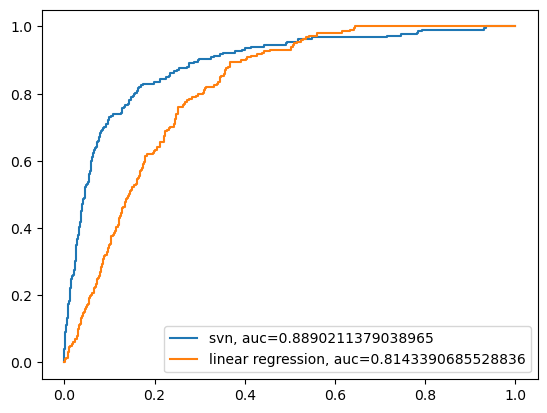

In [361]:
plt.figure(0).clf()
calculate_roc_curve(y_test, svn.predict(X_test), 'svn')
calculate_roc_curve(y_test, est.predict(sm.add_constant(X_test)), 'linear regression')

* 0.84, 0.82 para 5% das dimensões;
* 0.86, 0.81 para 5% das dimensões incluindo as horas;
* só o select de 50% das features 0.82, 0.8183 das dimensões;
* com select de 50% e pca de 50% 0.8194, 0.8340;
* com select de 50% e pca de 10% 0.8617, 0.8118;
* com select de 70% e pca de 5% 0.8661, 0.812;
* com select de 80% e pca de 5% 0.8731, 0.8136;
* com select de 80% e svd de 1% 0.8890, 0.8114;
O que funciona é um seleção alta e um pca bem pequeno;

In [72]:
from sklearn.feature_selection import chi2

chi2_stats, p_values = chi2(X_train, y_train)

pd.Series(chi2_stats).sort_values()

231      0.000089
164      0.000092
155      0.000178
158      0.000237
295      0.000313
          ...    
29     123.961416
92     144.070555
40     146.989457
58            NaN
59            NaN
Length: 382, dtype: float64

In [ ]:
X_train.iloc[:, 29]